In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout, LSTM, RepeatVector
from keras.layers import Flatten, Conv1D,MaxPooling1D
from keras.utils import plot_model

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('portland-oregon-average-monthly.csv')

In [3]:
df.head(10)

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630
5,1960-06,622
6,1960-07,617
7,1960-08,613
8,1960-09,661
9,1960-10,695


In [4]:
df.columns = ['Month', 'Avg_Ridership']

In [5]:
df.sample(10)

,Month,Avg_Ridership
59,1964-12,1155
110,1969-03,1419
58,1964-11,1234
36,1963-01,1102
82,1966-11,1467
71,1965-12,1188
42,1963-07,984
10,1960-11,690
49,1964-02,1200
22,1961-11,780


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          115 non-null    object
 1   Avg_Ridership  115 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


In [7]:
df['Avg_Ridership'].unique()

array(['648', '646', '639', '654', '630', '622', '617', '613', '661',
       '695', '690', '707', '817', '839', '810', '789', '760', '724',
       '704', '691', '745', '803', '780', '761', '857', '907', '873',
       '910', '900', '880', '867', '854', '928', '1064', '1103', '1026',
       '1102', '1080', '1034', '1083', '1078', '1020', '984', '952',
       '1033', '1114', '1160', '1058', '1209', '1200', '1130', '1182',
       '1152', '1116', '1098', '1044', '1142', '1222', '1234', '1155',
       '1286', '1281', '1224', '1280', '1228', '1181', '1156', '1124',
       '1205', '1260', '1188', '1212', '1269', '1246', '1299', '1284',
       '1345', '1341', '1308', '1448', '1454', '1467', '1431', '1510',
       '1558', '1536', '1523', '1492', '1437', '1365', '1310', '1441',
       '1450', '1424', '1360', '1429', '1440', '1414', '1408', '1337',
       '1258', '1214', '1326', '1417', '1329', '1461', '1425', '1419',
       '1432', '1394', '1327', nan, ' n=114'], dtype=object)

In [8]:
df['Avg_Ridership'] = df['Avg_Ridership'].replace(' n=114',np.nan)

In [9]:
df = df.dropna()

In [10]:
df['Avg_Ridership'].unique()

array(['648', '646', '639', '654', '630', '622', '617', '613', '661',
       '695', '690', '707', '817', '839', '810', '789', '760', '724',
       '704', '691', '745', '803', '780', '761', '857', '907', '873',
       '910', '900', '880', '867', '854', '928', '1064', '1103', '1026',
       '1102', '1080', '1034', '1083', '1078', '1020', '984', '952',
       '1033', '1114', '1160', '1058', '1209', '1200', '1130', '1182',
       '1152', '1116', '1098', '1044', '1142', '1222', '1234', '1155',
       '1286', '1281', '1224', '1280', '1228', '1181', '1156', '1124',
       '1205', '1260', '1188', '1212', '1269', '1246', '1299', '1284',
       '1345', '1341', '1308', '1448', '1454', '1467', '1431', '1510',
       '1558', '1536', '1523', '1492', '1437', '1365', '1310', '1441',
       '1450', '1424', '1360', '1429', '1440', '1414', '1408', '1337',
       '1258', '1214', '1326', '1417', '1329', '1461', '1425', '1419',
       '1432', '1394', '1327'], dtype=object)

In [11]:
df['Avg_Ridership'] = pd.to_numeric(df['Avg_Ridership'])

In [12]:
data = pd.DataFrame(list(df['Avg_Ridership']), index = df['Month'], columns=['ridership'])

In [13]:
data.sample(10)

,ridership
Month,
1966-09,1448
1969-02,1425
1960-11,690
1963-02,1080
1963-03,1034
1968-08,1214
1962-01,857
1969-05,1394
1961-10,803


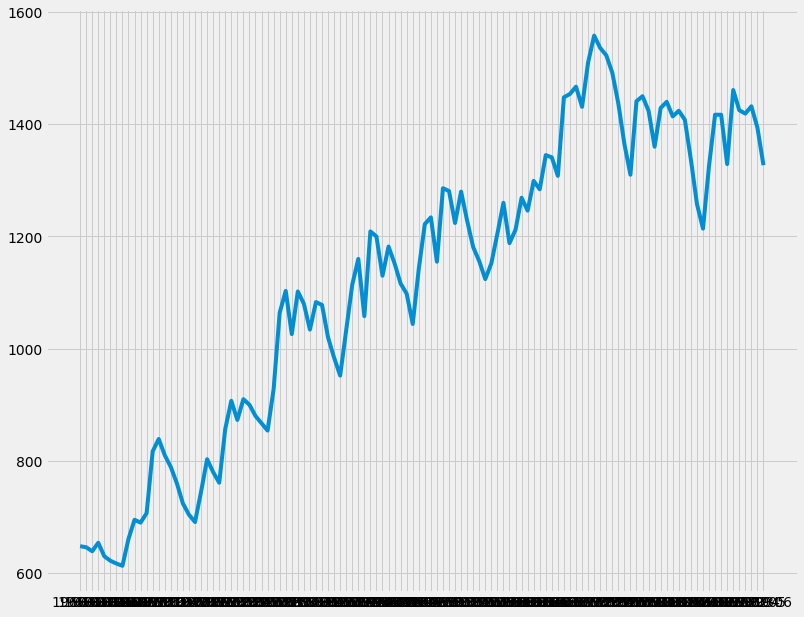

In [14]:
plt.figure(figsize =(12,10))
plt.plot(data)


In [15]:
sc = MinMaxScaler(feature_range=(-1,1))
data = sc.fit_transform(data)

In [16]:
data[:10]

array([[-0.92592593],
       [-0.93015873],
       [-0.94497354],
       [-0.91322751],
       [-0.96402116],
       [-0.98095238],
       [-0.99153439],
       [-1.        ],
       [-0.8984127 ],
       [-0.82645503]])

In [17]:
data.shape

(114, 1)

In [18]:
look_back = 10
dataX, dataY = [],[]
for i in range(len(data)-(look_back)):
    dataX.append(data[i:i+look_back])
    dataY.append(data[i+look_back])

In [19]:
dataX = np.asanyarray(dataX)
dataY = np.asanyarray(dataY)

In [20]:
xtrain = dataX[:91,:,:]
xtest = dataX[91:,:,:]
ytrain = dataY[:91]
ytest = dataY[91:]

In [21]:
xtrain.shape,ytrain.shape

((91, 10, 1), (91, 1))

In [22]:
xtest.shape,ytest.shape

((13, 10, 1), (13, 1))

CNN-LSTM Model

In [23]:
model = Sequential()
model.add(Conv1D(filters =256,kernel_size=2, activation = 'relu', input_shape=(10,1)))
model.add(Conv1D(filters =128,kernel_size=2,activation = 'relu', input_shape=(10,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(10))
model.add(LSTM(128,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',optimizer = 'adam')


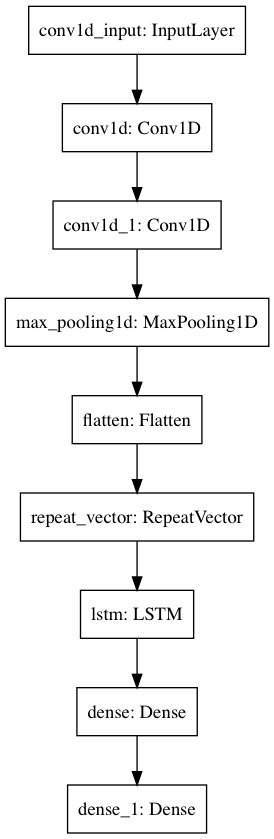

In [24]:
plot_model(model,to_file= 'model_plot.png')

In [25]:
history=model.fit(xtrain,ytrain,epochs=100,verbose=1)

Epoch 1/100
3/3 [==============================] - 0s 16ms/step - loss: 0.2237
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0684
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0491
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0285
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0331
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0286
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0268
Epoch 8/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0245
Epoch 9/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0229
Epoch 10/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0222
Epoch 11/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0198
Epoch 12/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0190
Epoch 13/100
3/3 [==============================]

In [26]:
pred = model.predict(xtest)
pred = sc.inverse_transform(pred)

In [27]:
pred[:10]

array([[1416.3632],
       [1378.4893],
       [1311.4368],
       [1362.5856],
       [1379.9331],
       [1342.0308],
       [1347.5621],
       [1406.1346],
       [1474.6158],
       [1467.6691]], dtype=float32)

In [28]:
ytest = sc.inverse_transform(ytest)

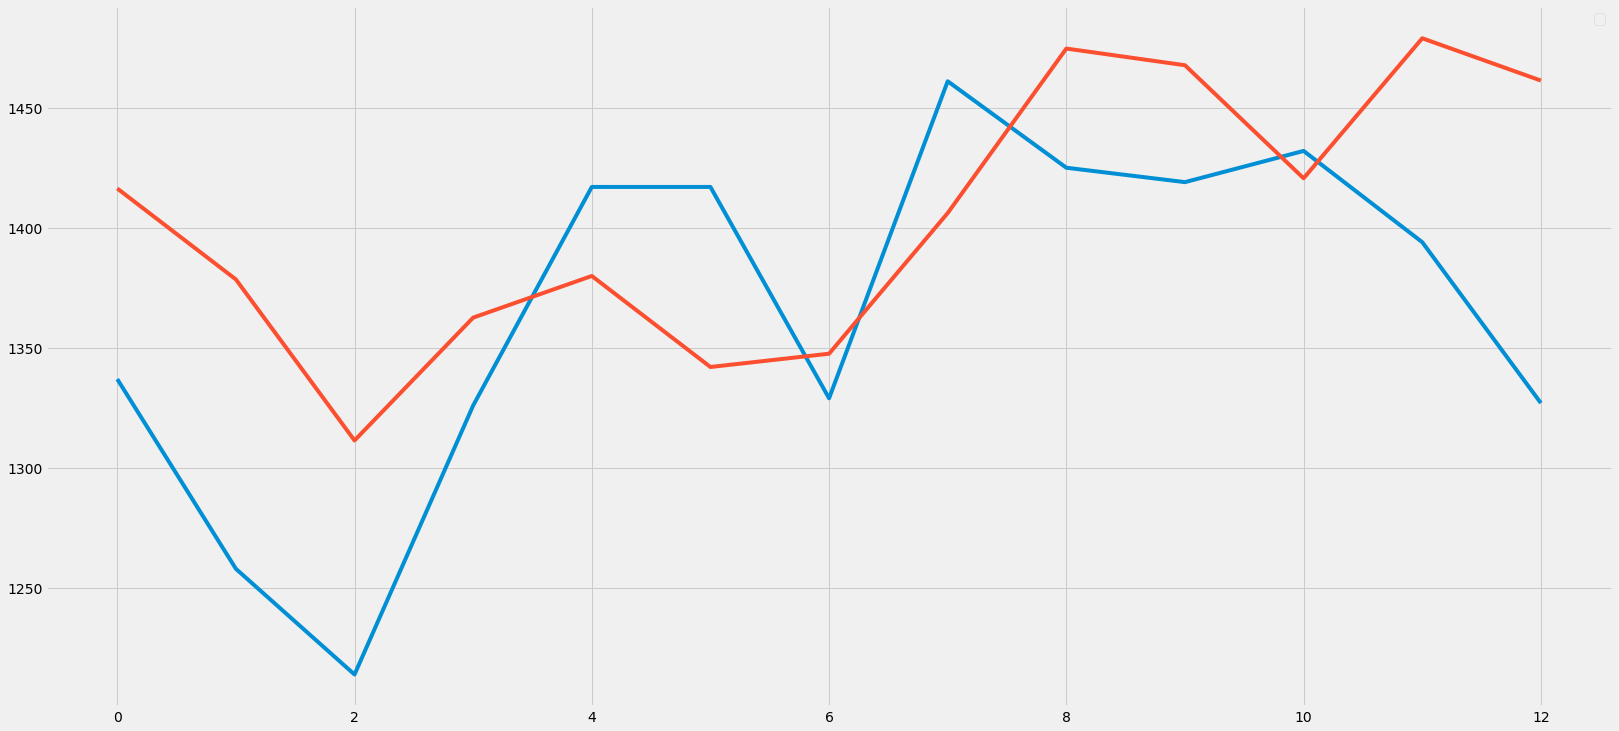

In [29]:
plt.figure(figsize = (25,12))
plt.plot(ytest)
plt.plot(pred)
plt.legend('Test','Prdicted')
plt.show()